In [75]:
using Catalyst, DifferentialEquations
using BlackBoxOptim
using CSV
using DataFrames
using DataStructures
using Statistics
using NaNStatistics
using Plots
using Latexify
include("../src/IRFConvolution.jl") 
include("../src/DataImport.jl")
include("../src/TypeDefinitions.jl")
include("../src/KineticModel.jl") 


resMap (generic function with 1 method)

## Define your kinetic model and parameter bounds
*Only edit this cell*

In [63]:
# import data
RealData = importData("/Users/jessicaflowers/Desktop/JULIA/data/Fe2O3/"; miss="NaN")
# RealData = RealData[1]

# define kinetic model
rs = @reaction_network begin
    k1, A --> 0
    k2, 2B --> 0
    k3, C --> 0
end

# odesys = convert(ODESystem, rs) # print the differential equations for this reaction system
# latexify(rs) # print the reaction system

# define bounds for the parameter optimization 
state_lower = [1.0e6, 8e4, 1.0e6] # A, B, C
state_upper = [1.0e6, 8e6, 1.0e6] 

IRF_lower = [0.1, 0.01] # μ, σ
IRF_upper = [0.2, 0.08]

rate_const_lower = [0.001, 1e-7, 1e-8] # k1, k2, k3, ...
rate_const_upper = [0.01, 1e-5, 1e-6]

┌ Warning: `datarow` keyword argument is deprecated; use `skipto` instead
└ @ CSV /Users/jessicaflowers/.julia/packages/CSV/OnldF/src/context.jl:352
┌ Warning: `type` keyword argument is deprecated; a single type can be passed to `types` instead
└ @ CSV /Users/jessicaflowers/.julia/packages/CSV/OnldF/src/context.jl:356


3-element Vector{Float64}:
 0.01
 1.0e-5
 1.0e-6

### Pre-processing of the input csv file

In [64]:
# Extract wavelength range and time vector, wavelength range is the first column and time vector is the first row
wavelength = RealData.x
wavelength = vcat(wavelength...)
time = RealData.y
time = vcat(time...)
Data = RealData.z
Data = (vcat(Data...))
Data = coalesce.(Data, NaN)


# create bounds array
lower = vcat(state_lower, IRF_lower, rate_const_lower)
upper = vcat(state_upper, IRF_upper, rate_const_upper)

bounds = Array{Tuple{Float64, Float64}}(undef,length(lower))
for k in 1:length(lower)
    bounds[k] = (lower[k], upper[k])
end

### Run the optimization

In [65]:
OP = run_optim(Objective, bounds)

Starting optimization with optimizer DiffEvoOpt{FitPopulation{Float64}, RadiusLimitedSelector, BlackBoxOptim.AdaptiveDiffEvoRandBin{3}, RandomBound{ContinuousRectSearchSpace}}
0.00 secs, 0 evals, 0 steps
0.51 secs, 89 evals, 47 steps

, improv/step: 0.468 (last = 0.4681), fitness=0.002487699


1.01 secs, 194 evals, 116 steps, improv/step: 0.414 (last = 0.3768), fitness=0.002471388
1.51 secs, 293 evals, 199 steps

, improv/step: 0.432 (last = 0.4578), fitness=0.001975124


2.01 secs, 404 evals, 304 steps, improv/step: 0.411 (last = 0.3714), fitness=0.001975124
2.51 secs, 527 evals, 434 steps

, improv/step: 0.380 (last = 0.3077), fitness=0.001904851


3.01 secs, 649 evals, 558 steps, improv/step: 0.373 (last = 0.3468), fitness=0.001904851
3.51 secs, 771 evals, 683 steps

, improv/step: 0.363 (last = 0.3200), fitness=0.001700599


4.01 secs, 897 evals, 814 steps, improv/step: 0.346 (last = 0.2595), fitness=0.001688923
4.51 secs, 1016 evals, 944 steps

, improv/step: 0.336 (last = 0.2692), fitness=0.001685447


5.02 secs, 1137 evals, 1069 steps, improv/step: 0.326 (last = 0.2560), fitness=0.001684997
5.52 secs, 1256 evals, 1195 steps

, improv/step: 0.318 (last = 0.2460), fitness=0.001673634


6.02 secs, 1382 evals, 1333 steps, improv/step: 0.303 (last = 0.1739), fitness=0.001647362
6.52 secs, 1488 evals, 1444 steps

, improv/step: 0.292 (last = 0.1622), fitness=0.001644273


7.03 secs, 1605 evals, 1572 steps, improv/step: 0.282 (last = 0.1719), fitness=0.001644273
7.53 secs, 1723 evals, 1693 steps

, improv/step: 0.276 (last = 0.1901), fitness=0.001644273


8.03 secs, 1839 evals, 1811 steps, improv/step: 0.273 (last = 0.2373), fitness=0.001644273
8.53 secs, 1956 evals, 1932 steps

, improv/step: 0.267 (last = 0.1736), fitness=0.001644273


9.03 secs, 2077 evals, 2064 steps, improv/step: 0.262 (last = 0.1894), fitness=0.001642712
9.54 secs, 2194 evals, 2189 steps

, improv/step: 0.259 (last = 0.2000), fitness=0.001641171


10.05 secs, 2316 evals, 2319 steps, improv/step: 0.251 (last = 0.1308), fitness=0.001641171
10.55 secs, 2435 evals, 2441 steps

, improv/step: 0.247 (last = 0.1557), fitness=0.001639355


11.06 secs, 2549 evals, 2557 steps, improv/step: 0.245 (last = 0.2069), fitness=0.001639355
11.56 secs, 2667 evals, 2678 steps

, improv/step: 0.240 (last = 0.1488), fitness=0.001638382


12.06 secs, 2789 evals, 2807 steps, improv/step: 0.239 (last = 0.2093), fitness=0.001636828
12.56 secs, 2900 evals, 2921 steps

, improv/step: 0.236 (last = 0.1579), fitness=0.001636661


13.06 secs, 3008 evals, 3033 steps, improv/step: 0.234 (last = 0.1875), fitness=0.001636661
13.57 secs, 3127 evals, 3155 steps

, improv/step: 0.233 (last = 0.2049), fitness=0.001636103


14.07 secs, 3245 evals, 3282 steps, improv/step: 0.230 (last = 0.1654), fitness=0.001636103
14.57 secs, 3362 evals, 3406 steps

, improv/step: 0.231 (last = 0.2500), fitness=0.001635750


15.07 secs, 3479 evals, 3527 steps, improv/step: 0.228 (last = 0.1405), fitness=0.001635750
15.57 secs, 3598 evals, 3649 steps

, improv/step: 0.227 (last = 0.2049), fitness=0.001635750


16.07 secs, 3719 evals, 3774 steps, improv/step: 0.226 (last = 0.1920), fitness=0.001635750
16.58 secs, 3840 evals, 3898 steps

, improv/step: 0.223 (last = 0.1210), fitness=0.001635750


17.08 secs, 3962 evals, 4024 steps, improv/step: 0.220 (last = 0.1508), fitness=0.001635750
17.58 secs, 4083 evals, 4149 steps

, improv/step: 0.221 (last = 0.2320), fitness=0.001635747


18.09 secs, 4202 evals, 4271 steps, improv/step: 0.218 (last = 0.1066), fitness=0.001635745
18.59 secs, 4323 evals, 4403 steps

, improv/step: 0.217 (last = 0.1970), fitness=0.001635745


19.09 secs, 4436 evals, 4521 steps, improv/step: 0.217 (last = 0.2119), fitness=0.001635745
19.59 secs, 4552 evals, 4644 steps

, improv/step: 0.216 (last = 0.1951), fitness=0.001635690


20.10 secs, 4670 evals, 4768 steps, improv/step: 0.215 (last = 0.1694), fitness=0.001635690
20.60 secs, 4794 evals, 4896 steps

, improv/step: 0.215 (last = 0.2266), fitness=0.001635643


21.10 secs, 4913 evals, 5019 steps, improv/step: 0.215 (last = 0.2033), fitness=0.001635643
21.60 secs, 5035 evals, 5149 steps

, improv/step: 0.215 (last = 0.2231), fitness=0.001635643


22.11 secs, 5155 evals, 5274 steps, improv/step: 0.214 (last = 0.1600), fitness=0.001635643
22.61 secs, 5275 evals, 5402 steps

, improv/step: 0.212 (last = 0.1250), fitness=0.001635643


23.11 secs, 5393 evals, 5529 steps, improv/step: 0.211 (last = 0.1654), fitness=0.001635634
23.61 secs, 5514 evals, 5660 steps

, improv/step: 0.210 (last = 0.1832), fitness=0.001635627


24.11 secs, 5610 evals, 5758 steps, improv/step: 0.211 (last = 0.2551), fitness=0.001635627
24.61 secs, 5718 evals, 5871 steps

, improv/step: 0.212 (last = 0.2566), fitness=0.001635627


25.11 secs, 5806 evals, 5967 steps, improv/step: 0.212 (last = 0.2083), fitness=0.001635625
25.61 secs, 5906 evals, 6073 steps

, improv/step: 0.212 (last = 0.2075), fitness=0.001635625


26.11 secs, 5993 evals, 6161 steps, improv/step: 0.211 (last = 0.1932), fitness=0.001635624
26.61 secs, 6086 evals, 6257 steps

, improv/step: 0.211 (last = 0.2083), fitness=0.001635624


27.12 secs, 6188 evals, 6363 steps, improv/step: 0.211 (last = 0.2075), fitness=0.001635624
27.62 secs, 6294 evals, 6477 steps

, improv/step: 0.211 (last = 0.1754), fitness=0.001635624


28.13 secs, 6388 evals, 6575 steps, improv/step: 0.210 (last = 0.1735), fitness=0.001635622
28.63 secs, 6490 evals, 6680 steps

, improv/step: 0.210 (last = 0.1905), fitness=0.001635621


29.13 secs, 6581 evals, 6779 steps, improv/step: 0.210 (last = 0.2222), fitness=0.001635621
29.63 secs, 6675 evals, 6883 steps

, improv/step: 0.209 (last = 0.1635), fitness=0.001635621


30.14 secs, 6777 evals, 6992 steps, improv/step: 0.209 (last = 0.2018), fitness=0.001635621
30.64 secs, 6900 evals, 7127 steps

, improv/step: 0.209 (last = 0.2222), fitness=0.001635621


31.14 secs, 7009 evals, 7240 steps, improv/step: 0.210 (last = 0.2301), fitness=0.001635620
31.65 secs, 7114 evals, 7347 steps

, improv/step: 0.209 (last = 0.1589), fitness=0.001635620


32.16 secs, 7215 evals, 7452 steps, improv/step: 0.209 (last = 0.2000), fitness=0.001635620
32.66 secs, 7339 evals, 7585 steps

, improv/step: 0.208 (last = 0.1805), fitness=0.001635619


33.17 secs, 7449 evals, 7701 steps, improv/step: 0.208 (last = 0.1724), fitness=0.001635619
33.67 secs, 7572 evals, 7834 steps

, improv/step: 0.207 (last = 0.1805), fitness=0.001635619


34.20 secs, 7682 evals, 7947 steps, improv/step: 0.207 (last = 0.2212), fitness=0.001635618
34.70 secs, 7792 evals, 8060 steps

, improv/step: 0.209 (last = 0.2920), fitness=0.001635618


35.21 secs, 7908 evals, 8184 steps, improv/step: 0.209 (last = 0.2097), fitness=0.001635618
35.71 secs, 8039 evals, 8318 steps

, improv/step: 0.210 (last = 0.2836), fitness=0.001635618


36.21 secs, 8145 evals, 8432 steps, improv/step: 0.210 (last = 0.2368), fitness=0.001635618
36.71 secs, 8261 evals, 8554 steps

, improv/step: 0.210 (last = 0.1639), fitness=0.001635618


37.22 secs, 8370 evals, 8668 steps, improv/step: 0.210 (last = 0.2018), fitness=0.001635618
37.72 secs, 8498 evals, 8802 steps

, improv/step: 0.209 (last = 0.1716), fitness=0.001635618


38.22 secs, 8596 evals, 8904 steps, improv/step: 0.209 (last = 0.2255), fitness=0.001635618
38.72 secs, 8717 evals, 9035 steps

, improv/step: 0.208 (last = 0.1527), fitness=0.001635618


39.23 secs, 8819 evals, 9141 steps, improv/step: 0.209 (last = 0.2264), fitness=0.001635618
39.73 secs, 8949 evals, 9281 steps

, improv/step: 0.208 (last = 0.1786), fitness=0.001635618


40.23 secs, 9065 evals, 9402 steps, improv/step: 0.208 (last = 0.1736), fitness=0.001635618
40.73 secs, 9185 evals, 9528 steps

, improv/step: 0.208 (last = 0.2063), fitness=0.001635618


41.24 secs, 9293 evals, 9640 steps, improv/step: 0.207 (last = 0.1339), fitness=0.001635618
41.74 secs, 9424 evals, 9780 steps

, improv/step: 0.207 (last = 0.2286), fitness=0.001635618


42.24 secs, 9535 evals, 9896 steps, improv/step: 0.207 (last = 0.2155), fitness=0.001635618

Optimization stopped after 10001 steps and 42.66 seconds


Termination reason: Max number of steps (10000) reached
Steps per second = 234.41
Function evals per second = 225.86
Improvements/step = 0.20750
Total function evaluations = 9636


Best candidate found: [1.0e6, 7.65601e6, 1.0e6, 0.2, 0.0772193, 0.0051236, 1.55281e-7, 9.99997e-7]

Fitness: 0.001635618



BlackBoxOptim.OptimizationResults("adaptive_de_rand_1_bin_radiuslimited", "Max number of steps (10000) reached", 10001, 1.692315061189381e9, 42.66411519050598, ParamsDictChain[ParamsDictChain[Dict{Symbol, Any}(:RngSeed => 41348, :SearchRange => [(1.0e6, 1.0e6), (80000.0, 8.0e6), (1.0e6, 1.0e6), (0.1, 0.2), (0.01, 0.08), (0.001, 0.01), (1.0e-7, 1.0e-5), (1.0e-8, 1.0e-6)], :MaxSteps => 10000),Dict{Symbol, Any}()],Dict{Symbol, Any}(:CallbackInterval => -1.0, :TargetFitness => nothing, :TraceMode => :compact, :FitnessScheme => ScalarFitnessScheme{true}(), :MinDeltaFitnessTolerance => 1.0e-50, :NumDimensions => :NotSpecified, :FitnessTolerance => 1.0e-8, :TraceInterval => 0.5, :MaxStepsWithoutProgress => 10000, :MaxSteps => 10000…)], 9636, ScalarFitnessScheme{true}(), BlackBoxOptim.TopListArchiveOutput{Float64, Vector{Float64}}(0.0016356179283806512, [1.0e6, 7.656010674551271e6, 1.0e6, 0.19999999983393255, 0.07721929202455227, 0.005123600171512679, 1.5528101030171902e-7, 9.999973071876322e-

## Data processing and plotting

In [66]:
RecoveredParam = best_candidate(OP) # recover optimized parameter vector 
RecoveredData = GetData(RecoveredParam) # plug optimized parameters into GetData
DataMatrix = RecoveredData[1] # data matrix
RecoveredSpec = RecoveredData[2] # spectral signatures
RecoveredKinetics = RecoveredData[3] # kinetic

3×251 Matrix{Float64}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …     2.79394e-7       1.30855e-7
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     1139.69          1110.22
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0        9.94366e5   994217.0

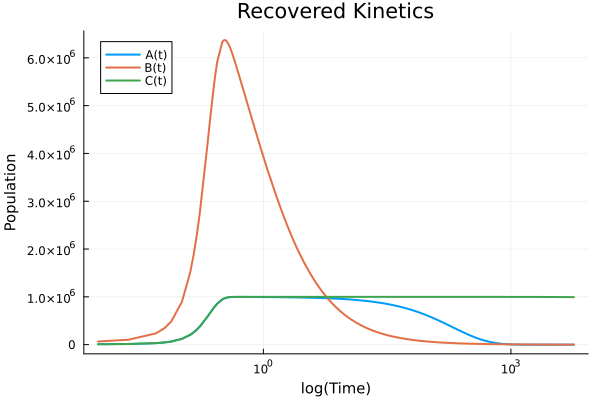

In [67]:
# kinetics
tpos = time.>0
Plots.plot(time[tpos], RecoveredKinetics[1,:][tpos], xscale=:log10,
     title="Recovered Kinetics", xlabel="log(Time)", legend=:topleft, ylabel="Population",
     linewidth = 2, xguidefontsize=10, yguidefontsize=10, label="A(t)")
Plots.plot!(time[tpos], RecoveredKinetics[2,:][tpos], xscale=:log10,
     linewidth = 2, xguidefontsize=10, yguidefontsize=10, label="B(t)")
Plots.plot!(time[tpos], RecoveredKinetics[3,:][tpos], xscale=:log10,
linewidth = 2, xguidefontsize=10, yguidefontsize=10, label="C(t)")


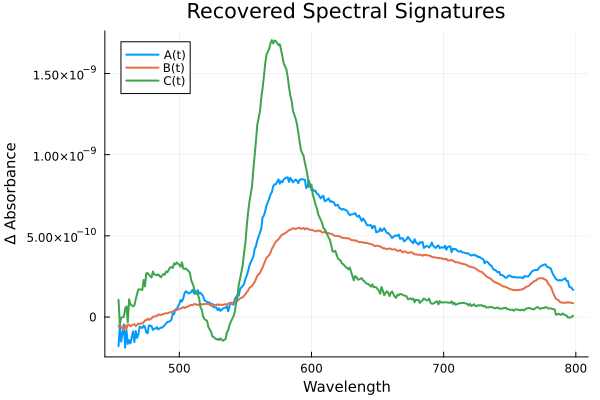

In [68]:
# Spectral Signatures

Plots.plot(wavelength, RecoveredSpec[:,1], title="Recovered Spectral Signatures", xlabel="Wavelength",
linewidth = 2, xguidefontsize=10, yguidefontsize=10, label="A(t)", ylabel="Δ Absorbance" ) 
Plots.plot!(wavelength, RecoveredSpec[:,2], title="Recovered Spectral Signatures", xlabel="Wavelength",
linewidth = 2, xguidefontsize=10, yguidefontsize=10, label="B(t)" ) 
Plots.plot!(wavelength, RecoveredSpec[:,3], title="Recovered Spectral Signatures", xlabel="Wavelength",
linewidth = 2, xguidefontsize=10, yguidefontsize=10, label="C(t)" ) 

In [71]:
# residual maps 
Map = Objective(RecoveredParam; output="map") # why does this not work anymore?
# resMap(RecoveredParam)
residual_value = Objective(RecoveredParam)


0.0016356179283806512

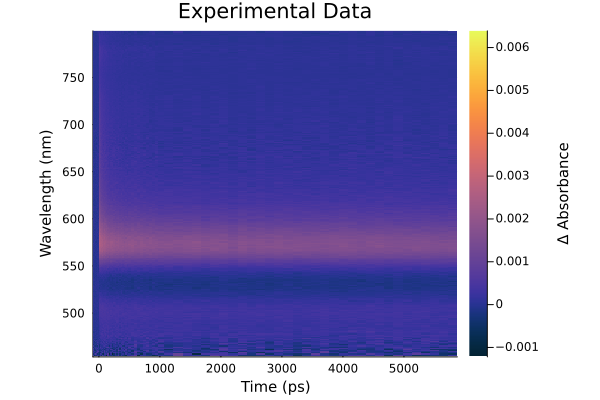

attempt to save state beyond implementation limit


In [72]:
# heatmap of real data
real_heatmap = heatmap(time, wavelength, Data, xlabel="Time (ps)", ylabel="Wavelength (nm)", title="Experimental Data", 
    colorbar_title="\n\nΔ Absorbance", right_margin=15Plots.mm, left_margin=10Plots.mm,
    xguidefontsize=10, yguidefontsize=10, c=:thermal)


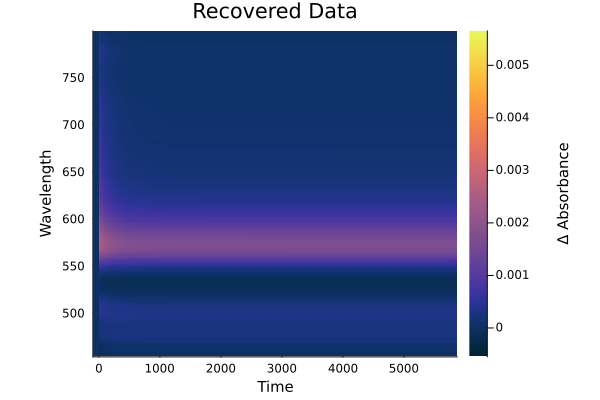

In [73]:
# heatmap of recovered data
optim_heatmap = heatmap(time, wavelength, DataMatrix, xlabel="Time", ylabel="Wavelength", 
    title="Recovered Data" ,colorbar_title="\n\nΔ Absorbance", right_margin=15Plots.mm, 
    left_margin=10Plots.mm, xguidefontsize=10, yguidefontsize=10, c=:thermal)
